In [47]:
#import functions
from pyspark.sql.functions import month, year, quarter, count, countDistinct
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, IntegerType, StringType, DateType

In [2]:
#creatig spark session
spark = SparkSession.builder.appName("sales_analysis").getOrCreate()

In [3]:
#Defining schema
schema = StructType([
    StructField("Product_id",IntegerType(), True),
    StructField("Customer_id",StringType(), True),
    StructField("Order_date",DateType(), True),
    StructField("Location",StringType(), True),
    StructField("Source_order",StringType(), True)
])

SALES DATAFRAME

In [4]:
#creating datframe
sales_df = spark.read.format("csv").option("inferschema","true").schema(schema).load(r'C:\Users\User\sales.csv.txt')
sales_df.show(5)

+----------+-----------+----------+--------+------------+
|Product_id|Customer_id|Order_date|Location|Source_order|
+----------+-----------+----------+--------+------------+
|         1|          A|2023-01-01|   India|      Swiggy|
|         2|          A|2022-01-01|   India|      Swiggy|
|         2|          A|2023-01-07|   India|      Swiggy|
|         3|          A|2023-01-10|   India|  Restaurant|
|         3|          A|2022-01-11|   India|      Swiggy|
+----------+-----------+----------+--------+------------+
only showing top 5 rows



In [5]:
#Deriving year, month and quarter

sales_df = sales_df.withColumn("order_year", year(sales_df.Order_date))

sales_df = sales_df.withColumn("order_month", month(sales_df.Order_date))

sales_df = sales_df.withColumn("order_quarter", quarter(sales_df.Order_date))

sales_df.show(5)

+----------+-----------+----------+--------+------------+----------+-----------+-------------+
|Product_id|Customer_id|Order_date|Location|Source_order|order_year|order_month|order_quarter|
+----------+-----------+----------+--------+------------+----------+-----------+-------------+
|         1|          A|2023-01-01|   India|      Swiggy|      2023|          1|            1|
|         2|          A|2022-01-01|   India|      Swiggy|      2022|          1|            1|
|         2|          A|2023-01-07|   India|      Swiggy|      2023|          1|            1|
|         3|          A|2023-01-10|   India|  Restaurant|      2023|          1|            1|
|         3|          A|2022-01-11|   India|      Swiggy|      2022|          1|            1|
+----------+-----------+----------+--------+------------+----------+-----------+-------------+
only showing top 5 rows



MENU DATAFRAME

In [6]:
schema1 = StructType([
    StructField("product_id",IntegerType(), True),
    StructField("Product_name", StringType(), True),
    StructField("Price", StringType(), True)
])

In [7]:
menu_df = spark.read.format("csv").schema(schema1).load(r'C:\Users\User\menu.csv.txt')
menu_df.show(5)

+----------+------------+-----+
|product_id|Product_name|Price|
+----------+------------+-----+
|         1|       PIZZA|  100|
|         2|     Chowmin|  150|
|         3|    sandwich|  120|
|         4|        Dosa|  110|
|         5|     Biryani|   80|
+----------+------------+-----+
only showing top 5 rows



Total amount spent by each customer

In [8]:
total_by_customer = (sales_df.join(menu_df,"product_id").groupBy("Customer_id").agg({'price':'sum'})
                     .orderBy("Customer_id"))

total_by_customer.show()

+-----------+----------+
|Customer_id|sum(price)|
+-----------+----------+
|          A|    4260.0|
|          B|    4440.0|
|          C|    2400.0|
|          D|    1200.0|
|          E|    2040.0|
+-----------+----------+



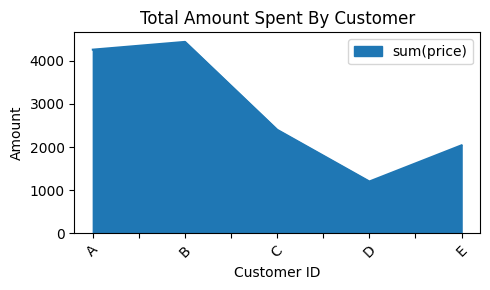

In [16]:
#plotting area chart using pandas
import pandas as pd 
import matplotlib.pyplot as plt

total_by_customer_pd = total_by_customer.toPandas()
total_by_customer_pd.plot(kind='area', x ='Customer_id', y='sum(price)', figsize=(5, 3))
   
plt.title('Total Amount Spent By Customer')
plt.xlabel('Customer ID')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.grid(False)
plt.tight_layout()
plt.show() 

•	Total amount spent in each food category

In [12]:
total_by_food_category = (sales_df.join(menu_df,"Product_id").groupBy("Product_name").agg({'price':'sum'})
                          .orderBy('Product_name'))
total_by_food_category.show()

+------------+----------+
|Product_name|sum(price)|
+------------+----------+
|     Biryani|     480.0|
|     Chowmin|    3600.0|
|        Dosa|    1320.0|
|       PIZZA|    2100.0|
|       Pasta|    1080.0|
|    sandwich|    5760.0|
+------------+----------+



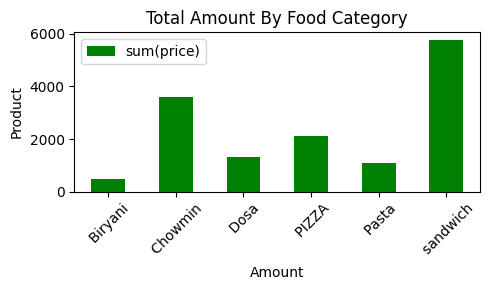

In [23]:
#visualization
total_by_food_category_pd = total_by_food_category.toPandas()

total_by_food_category_pd.plot(kind='bar', x ='Product_name', y='sum(price)', figsize=(5, 3), color = 'green')

plt.title('Total Amount By Food Category')
plt.xlabel('Amount')
plt.ylabel('Product')
plt.xticks(rotation=45)
plt.grid(False)
plt.tight_layout()
plt.show() 


•	Total amount of sales in each month

In [26]:
total_amount_by_month = (sales_df.join(menu_df,"product_id").groupBy('order_month').agg({'price':'sum'}))
total_amount_by_month.show()

+-----------+----------+
|order_month|sum(price)|
+-----------+----------+
|          1|    2960.0|
|          6|    2960.0|
|          3|     910.0|
|          5|    2960.0|
|          7|     910.0|
|         11|     910.0|
|          2|    2730.0|
+-----------+----------+



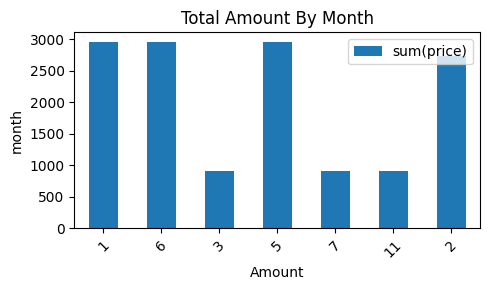

In [28]:
#visualization
total_amount_by_month_pd = total_amount_by_month.toPandas()

total_amount_by_month_pd.plot(kind='bar', x ='order_month', y='sum(price)', figsize=(5, 3))

plt.title('Total Amount By Month')
plt.xlabel('Amount')
plt.ylabel('month')
plt.xticks(rotation=45)
plt.grid(False)
plt.tight_layout()
plt.show()

•	Yearly sales

In [30]:
total_amount_by_year = (sales_df.join(menu_df,"product_id").groupBy('order_year').agg({'price':'sum'})
                        .orderBy('order_year'))
total_amount_by_year.show()

+----------+----------+
|order_year|sum(price)|
+----------+----------+
|      2022|    4350.0|
|      2023|    9990.0|
+----------+----------+



•	Quarterly sales

In [32]:
total_amount_by_quarter = (sales_df.join(menu_df,"product_id").groupBy('order_quarter').agg({'price':'sum'})
                           .orderBy('order_quarter'))
total_amount_by_quarter.show()

+-------------+----------+
|order_quarter|sum(price)|
+-------------+----------+
|            1|    6600.0|
|            2|    5920.0|
|            3|     910.0|
|            4|     910.0|
+-------------+----------+



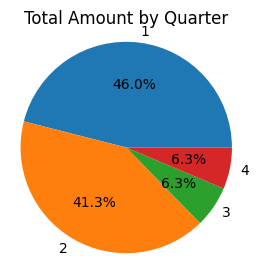

In [35]:
total_amount_by_quarter_pd = total_amount_by_quarter.toPandas()

# Plotting pie chart
plt.figure(figsize=(3, 3))
plt.pie(total_amount_by_quarter_pd['sum(price)'], labels=total_amount_by_quarter_pd['order_quarter'], autopct='%1.1f%%')
plt.title('Total Amount by Quarter')
plt.axis('equal')  
plt.show()

•	Total number of orders in each category


In [38]:
total_orders = (sales_df.join(menu_df,"product_id").groupBy('product_name').agg(count('product_id').alias('product_count'))
                .orderBy('product_count', ascending = 0))
total_orders.show()

+------------+-------------+
|product_name|product_count|
+------------+-------------+
|    sandwich|           48|
|     Chowmin|           24|
|       PIZZA|           21|
|        Dosa|           12|
|       Pasta|            6|
|     Biryani|            6|
+------------+-------------+



•	Top 5 order items

In [39]:
top_5 = total_orders.limit(5)
top_5.show()

+------------+-------------+
|product_name|product_count|
+------------+-------------+
|    sandwich|           48|
|     Chowmin|           24|
|       PIZZA|           21|
|        Dosa|           12|
|       Pasta|            6|
+------------+-------------+



•	Frequency of customer’s visits

In [53]:
frequency = (sales_df.filter(sales_df.Source_order=='Restaurant')
             .groupBy('customer_id').agg(countDistinct('order_date').alias('number_of_visits'))
             .orderBy('number_of_visits'))

frequency.show()

+-----------+----------------+
|customer_id|number_of_visits|
+-----------+----------------+
|          D|               1|
|          C|               3|
|          E|               5|
|          B|               6|
|          A|               6|
+-----------+----------------+



•	Total sales by location

In [43]:
total_by_location = (sales_df.join(menu_df, 'product_id').groupBy('Location').agg({'price':'sum'})
                     .orderBy('sum(price)', ascending = 0))
total_by_location.show()

+--------+----------+
|Location|sum(price)|
+--------+----------+
|      UK|    7020.0|
|   India|    4860.0|
|     USA|    2460.0|
+--------+----------+



•	Total sales by order source

In [46]:
total_by_source = (sales_df.join(menu_df, 'product_id').groupBy('Source_order').agg({'price':'sum'})
                   .orderBy('sum(price)', ascending = 0))
total_by_source.show()

+------------+----------+
|Source_order|sum(price)|
+------------+----------+
|      Swiggy|    6330.0|
|      zomato|    4920.0|
|  Restaurant|    3090.0|
+------------+----------+

